<a href="https://colab.research.google.com/github/debasishpohi1999/seeds.csv-df-/blob/main/Employee_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Report: **Employee Turnover Prediction**

### **Introduction:**

The project titled "Employee Turnover Prediction" aims to analyze a dataset related to employee attrition within a company and predict the likelihood of employees leaving the organization. Employee turnover, also known as attrition, poses significant challenges for organizations, including loss of talent, decreased productivity, and increased recruitment costs. By understanding the factors influencing attrition and developing predictive models, companies can proactively manage turnover and improve employee retention strategies.

### **Data Description:**

The dataset used in this analysis contains 1470 entries and 35 columns, with each row representing an individual employee and each column representing different attributes related to their employment. These attributes include demographic information such as age, gender, marital status, as well as job-related factors such as job role, department, education level, and indicators of job satisfaction like environment satisfaction, job involvement, and work-life balance. The target variable for analysis is "Attrition", which indicates whether an employee has left the company (Yes) or not (No).

### **Data Exploration and Preprocessing:**

The initial phase of the project involved exploring the dataset and preprocessing the data to ensure its quality and suitability for analysis:

**1.Initial Data Inspection:**
 The dataset was loaded using Pandas, and the first few rows were examined to understand its structure and content.

**2.Data Cleaning**: Missing values were checked, and duplicates were removed to ensure data integrity and reliability.

**3.Data Encoding**: Categorical variables were encoded using LabelEncoder to convert them into numerical format, which is required for machine learning algorithms.

### **Data Visualization:**

Various visualizations were created to gain insights into the dataset and understand the factors influencing employee turnover:

**1.Age Distribution**: A histogram was plotted to visualize the distribution of employee ages.

**2.Attrition Analysis:** Visualizations including counts, distribution across departments, job levels, education fields, marital status, overtime, and satisfaction levels were created to analyze the patterns and trends related to employee attrition.

### **Conclusion:**

The analysis provided valuable insights into the factors contributing to employee turnover within the organization. These insights can inform strategic decisions aimed at improving employee retention and satisfaction. Predictive modeling techniques can be further explored to develop models that accurately predict employee turnover based on the identified factors.

### **Future Steps:**

**1.Feature Engineering:** Explore additional features or transformations to enhance predictive modeling performance.

**2.Predictive Modeling:** Develop machine learning models to predict employee turnover based on the identified factors.

 **3.Model Evaluation:** Evaluate model performance using appropriate metrics and fine-tune the models as needed.

**4.Deployment:** Deploy trained models into production for real-time turnover prediction and monitoring.

### **References:**

Employee Turnover Prediction dataset: [https://datasets/ibm-hr-analytics-attrition-dataset]

1.Sklearn, Tensorflow, Pandas, and Matplotlib documentation for machine learning and data visualization techniques.

2.McKinney, W. (2017). Python for Data Analysis. O'Reilly Media, Inc.
Pedregosa, F., et al. (2011).

3.Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.

In [ ]:
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
# load the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Shape of the dataset
print("Shape of the dataset:",df.shape)

Shape of the dataset: (1470, 35)


In [ ]:
# DataSet columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Summary Statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

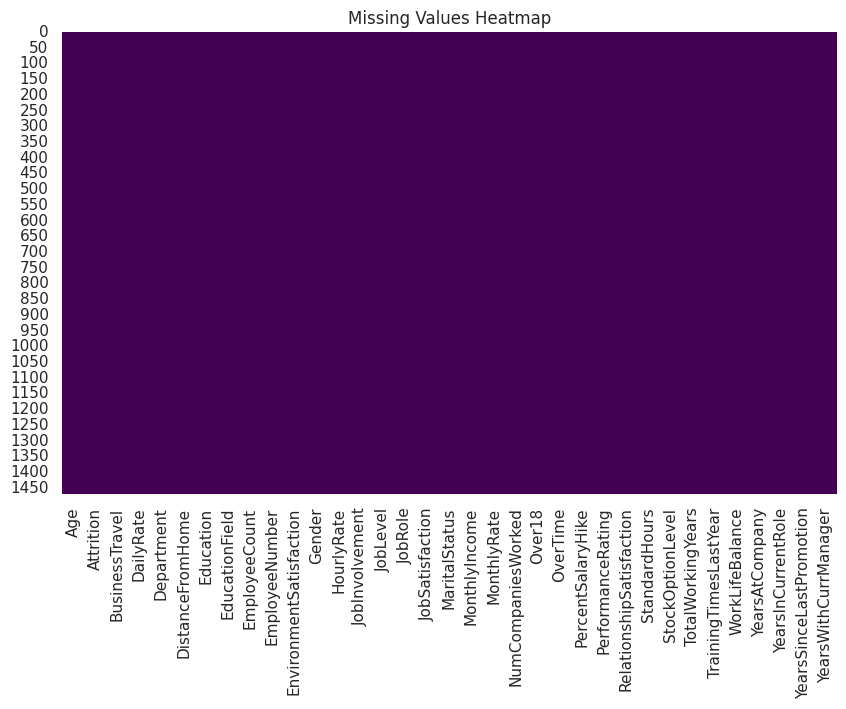

In [ ]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Find Duplicates
duplicates_row = df[df.duplicated()]

In [ ]:
# Print Duplicate Rows
print("Duplicates Rows:")
print(duplicates_row)

Duplicates Rows:
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [ ]:
# Check the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates: ", df.shape)

Shape of the dataset after removing duplicates:  (1470, 35)


In [ ]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

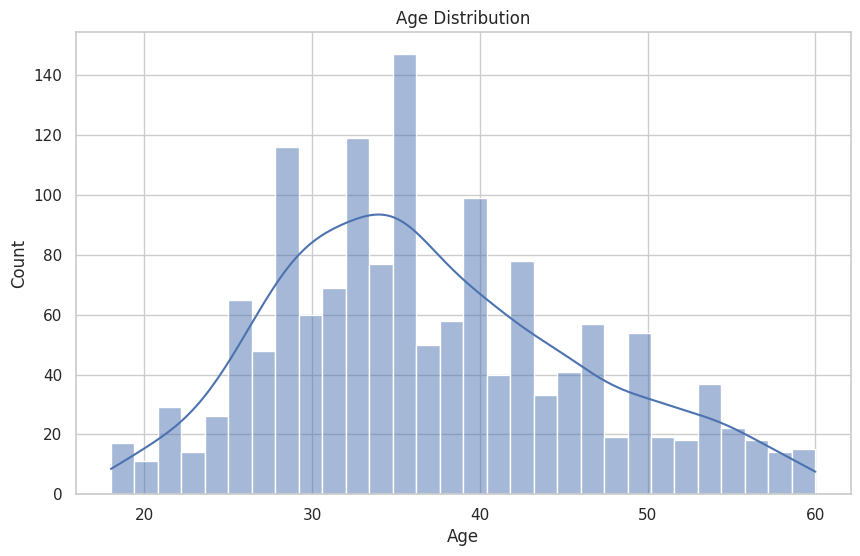

In [ ]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

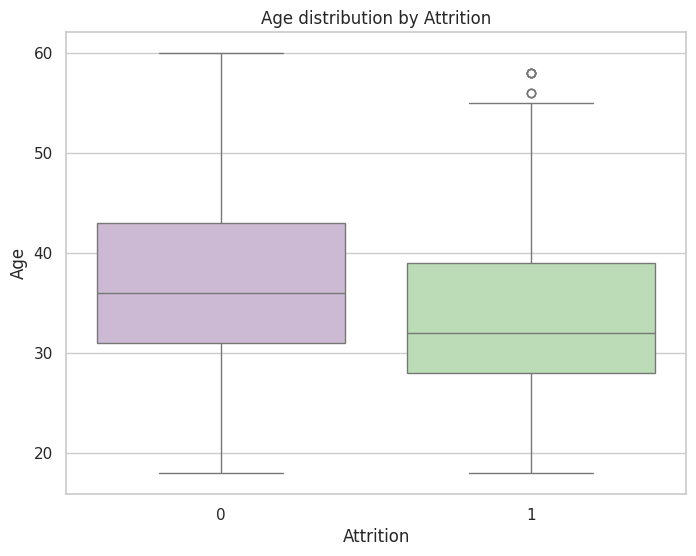

In [ ]:
# Age distribution by Attrition
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="Age", data=df, palette="PRGn")
plt.title("Age distribution by Attrition")
plt.show()

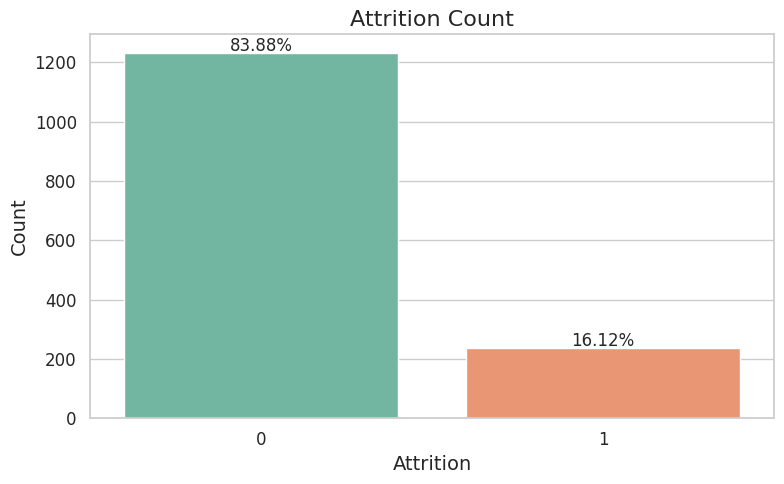

In [ ]:
# Attrition count with value counts
plt.figure(figsize=(8,5))
ax = sns.countplot(data = df, x = "Attrition", palette="Set2")

# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

# Customizing the plot
plt.title("Attrition Count", fontsize=16)
plt.xlabel('Attrition', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

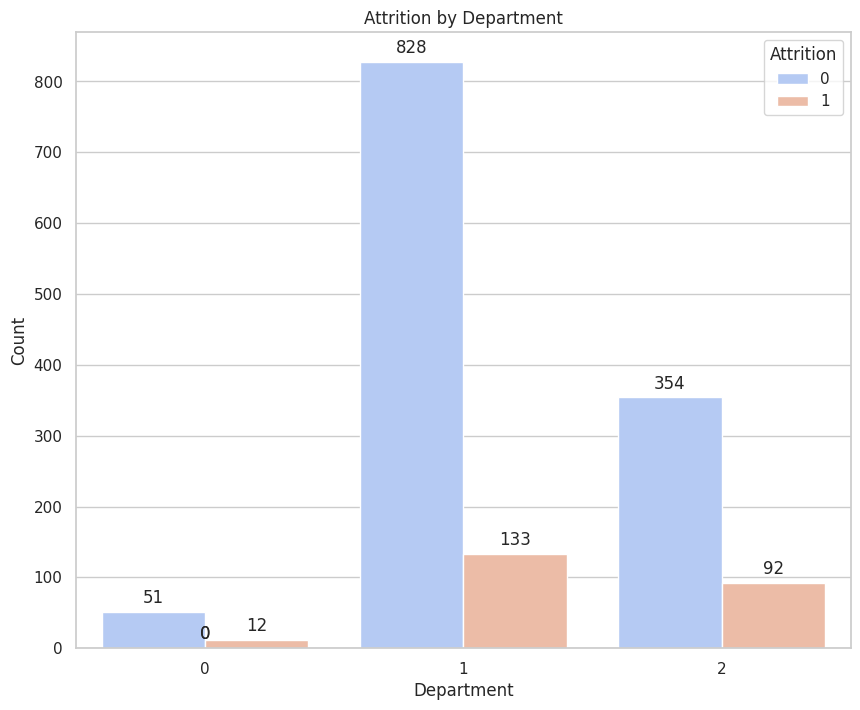

In [ ]:
# Attrition by Department
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df, x = "Department", hue="Attrition", palette="coolwarm")

# Add value counts on top of each her
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

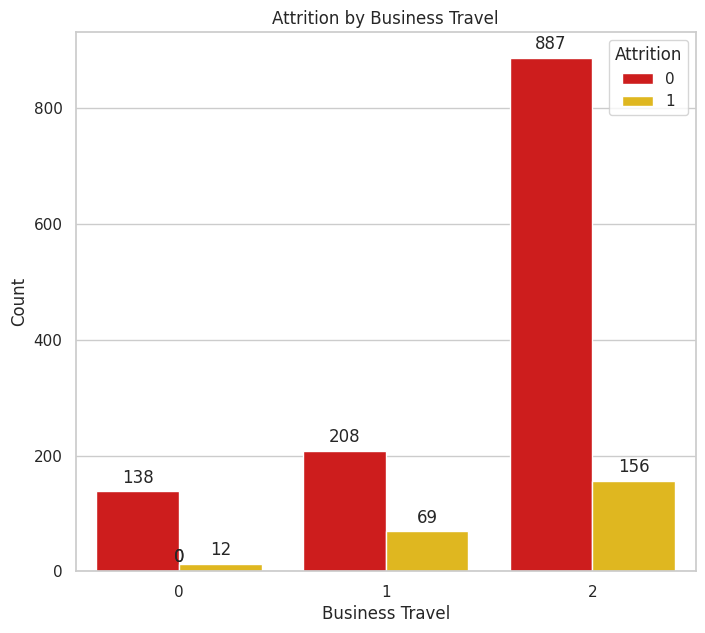

In [ ]:
# Attrition by Business Travel
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette="hot")
# Add value counts on top of each her
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

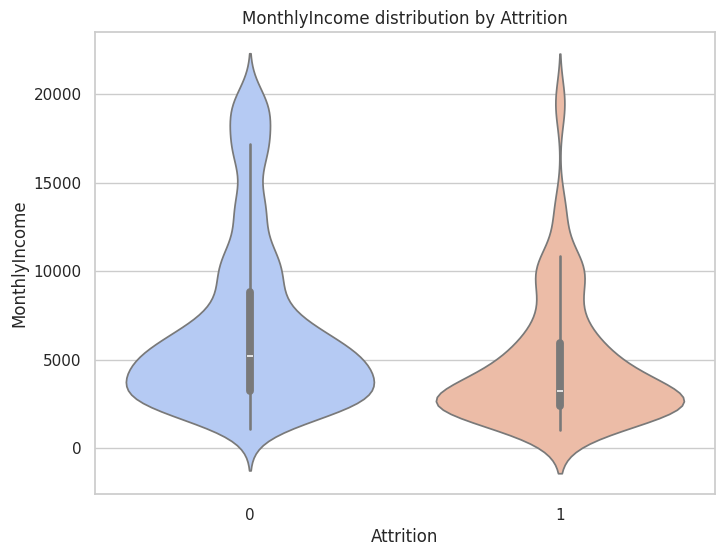

In [ ]:
# Monthly Income distribution by Attrition
plt.figure(figsize=(8, 6))
sns.violinplot(x='Attrition', y='MonthlyIncome', data=df, palette="coolwarm")
plt.title('MonthlyIncome distribution by Attrition')
plt.show()

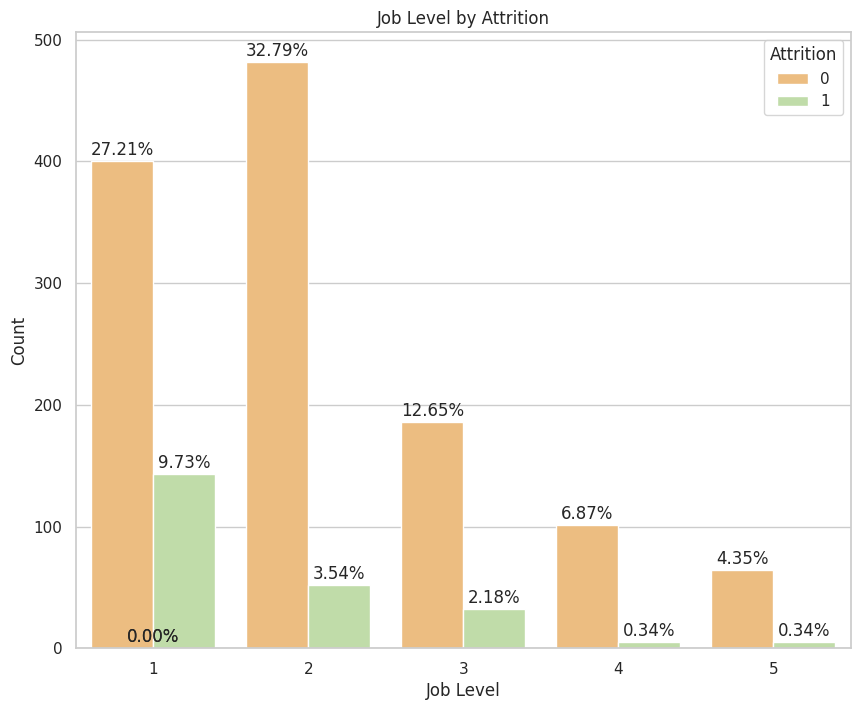

In [ ]:
# Job Level by Attrition
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='JobLevel', hue='Attrition', data=df, palette="Spectral")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

plt.title('Job Level by Attrition')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

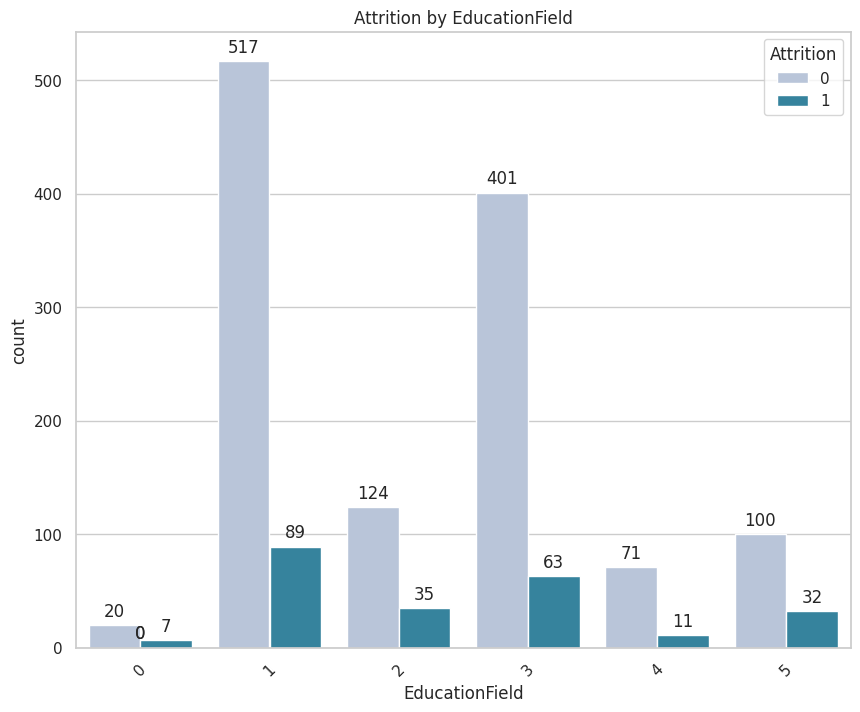

In [ ]:
# Attrition by Education Field
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='EducationField', hue='Attrition', data=df, palette="PuBuGn")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by EducationField')
plt.xticks(rotation=45)
plt.show()

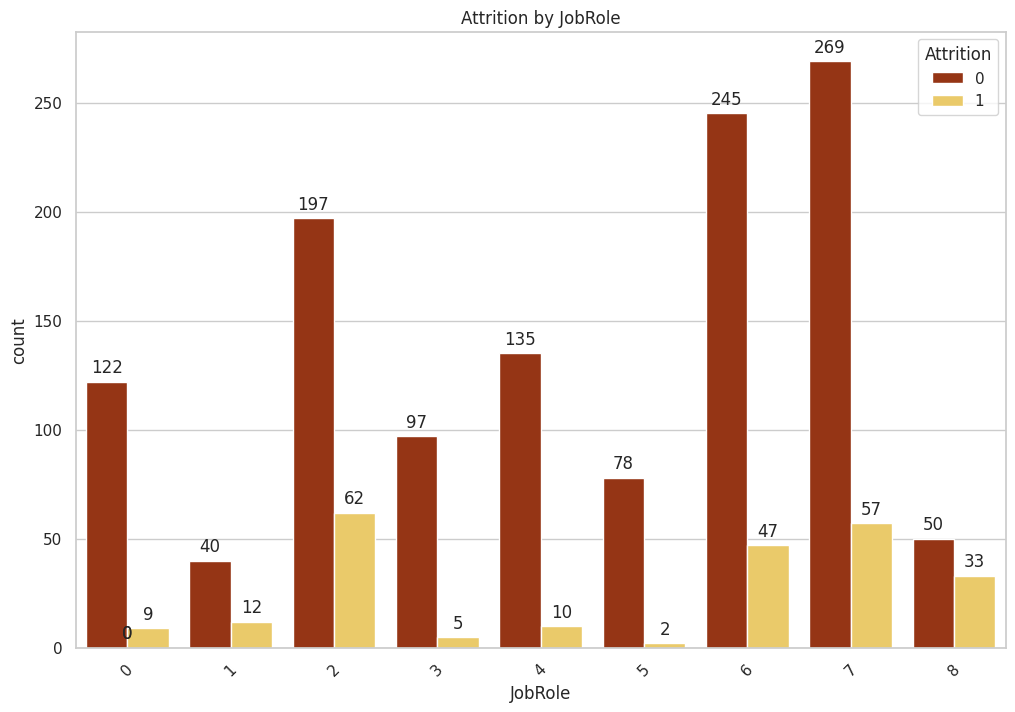

In [ ]:
# Attrition by JobRole
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='JobRole', hue='Attrition', data=df, palette="afmhot")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by JobRole')
plt.xticks(rotation=45)
plt.show()

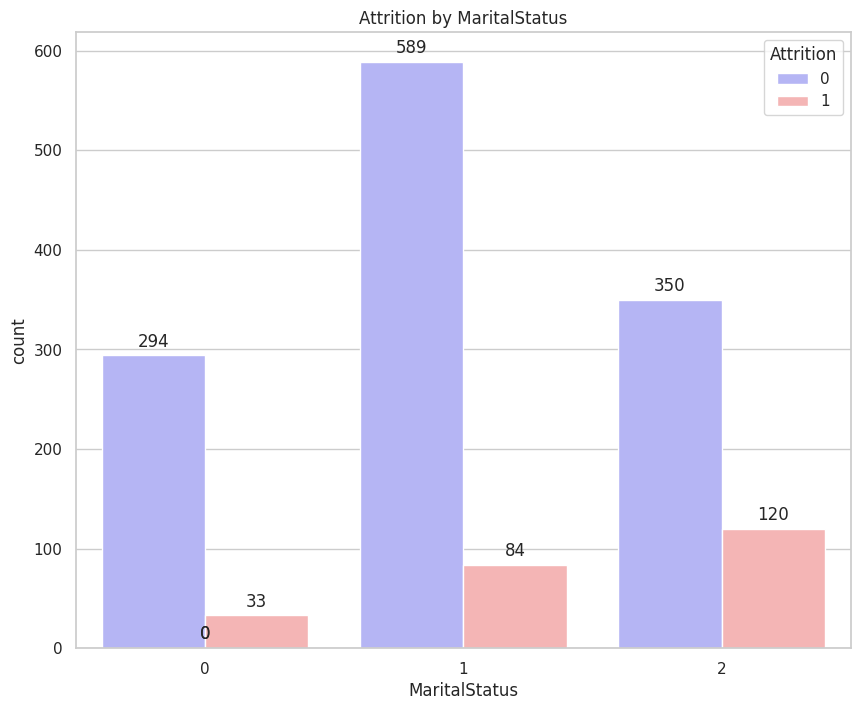

In [ ]:
# Attrition by Marital Status
plt.figure(figsize=(10, 8))
ax= sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette="bwr")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by MaritalStatus')
plt.show()

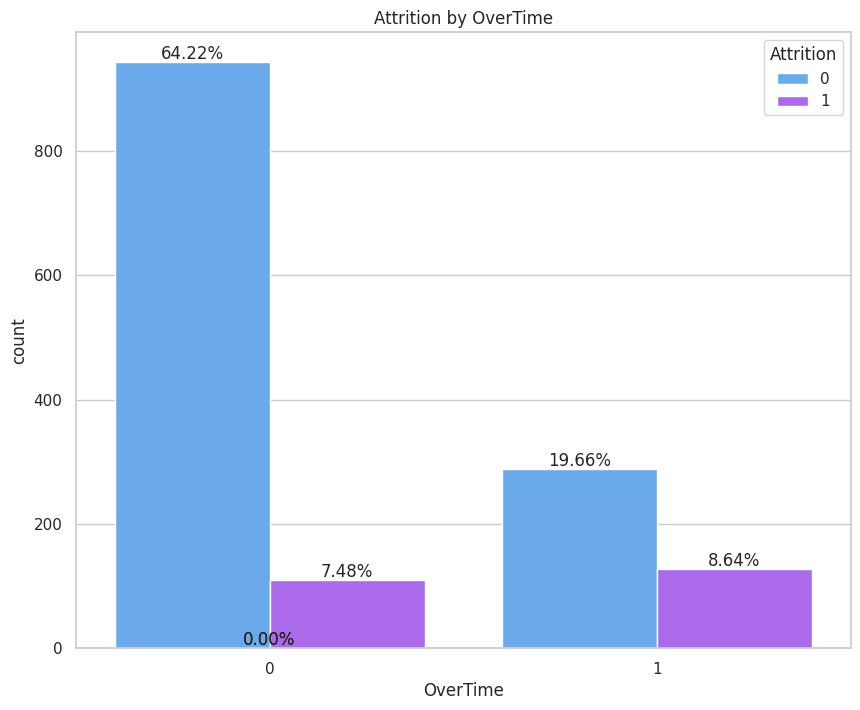

In [ ]:
# Attrition by Over Time
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='OverTime', hue='Attrition', data=df, palette="cool")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

plt.title('Attrition by OverTime')
plt.show()

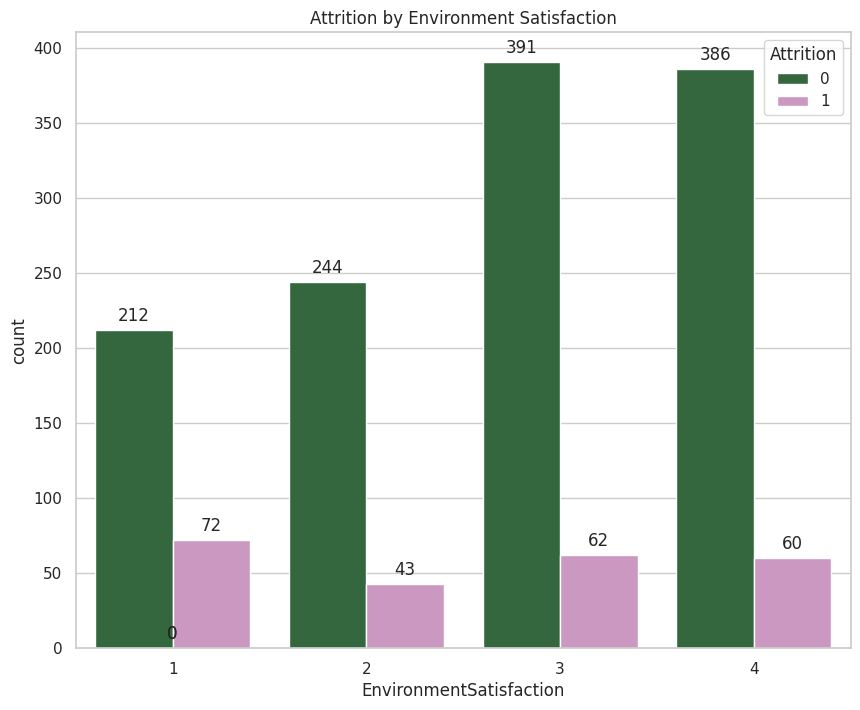

In [ ]:
#Attrition by Environment Satisfaction
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette="cubehelix")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Environment Satisfaction')
plt.show()

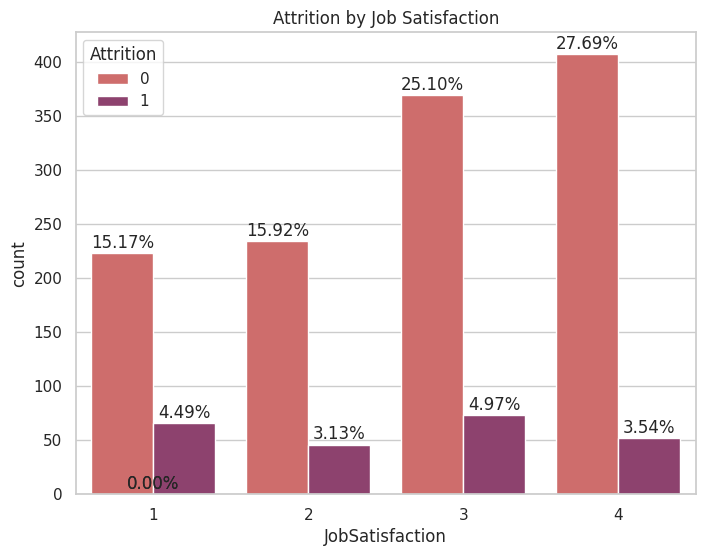

In [ ]:
# Attrition by Job Satisfaction
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette="flare")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
plt.title('Attrition by Job Satisfaction')
plt.show()

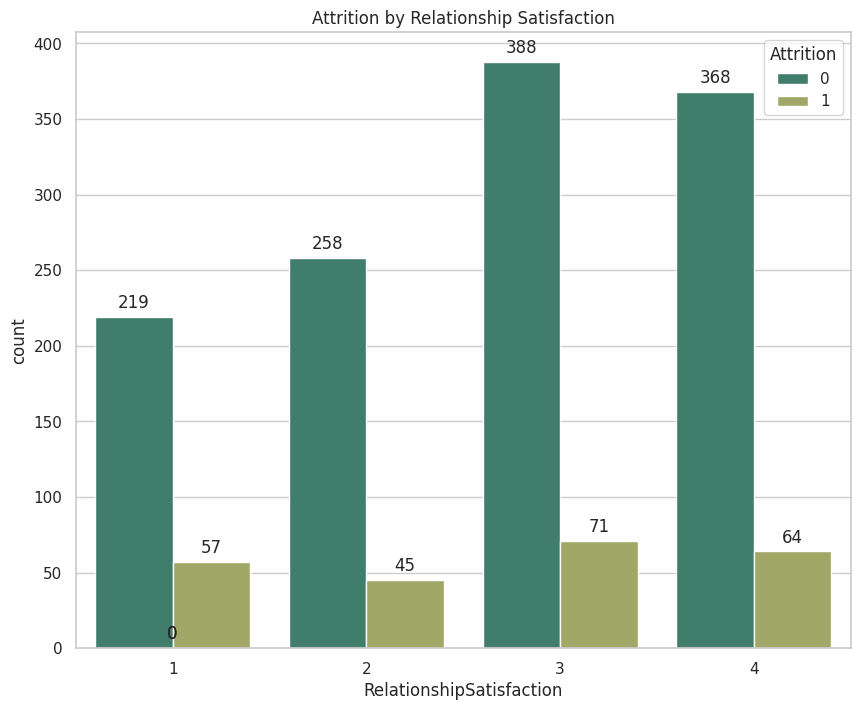

In [ ]:
# Attrition by Relationship Satisfaction
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette="gist_earth")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.title('Attrition by Relationship Satisfaction')
plt.show()

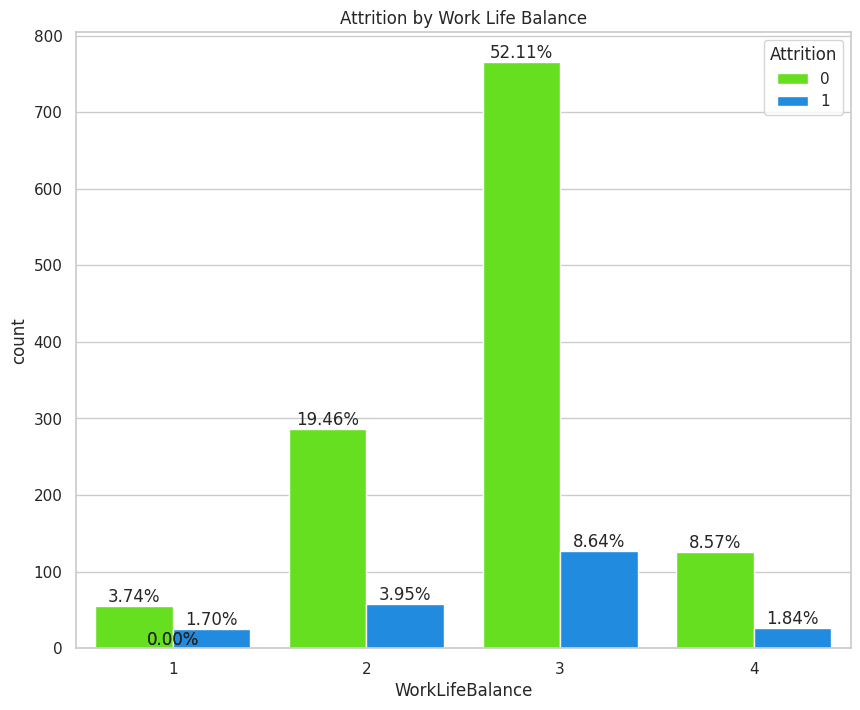

In [ ]:
# Attrition by Work Life Balance
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette="gist_rainbow")
# Add value counts on top of each her
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +  p.get_width() / 2.,
            height+5,
            '{:.2f}%'.format((height/total)*100),
            ha="center")
plt.title('Attrition by Work Life Balance')
plt.show()

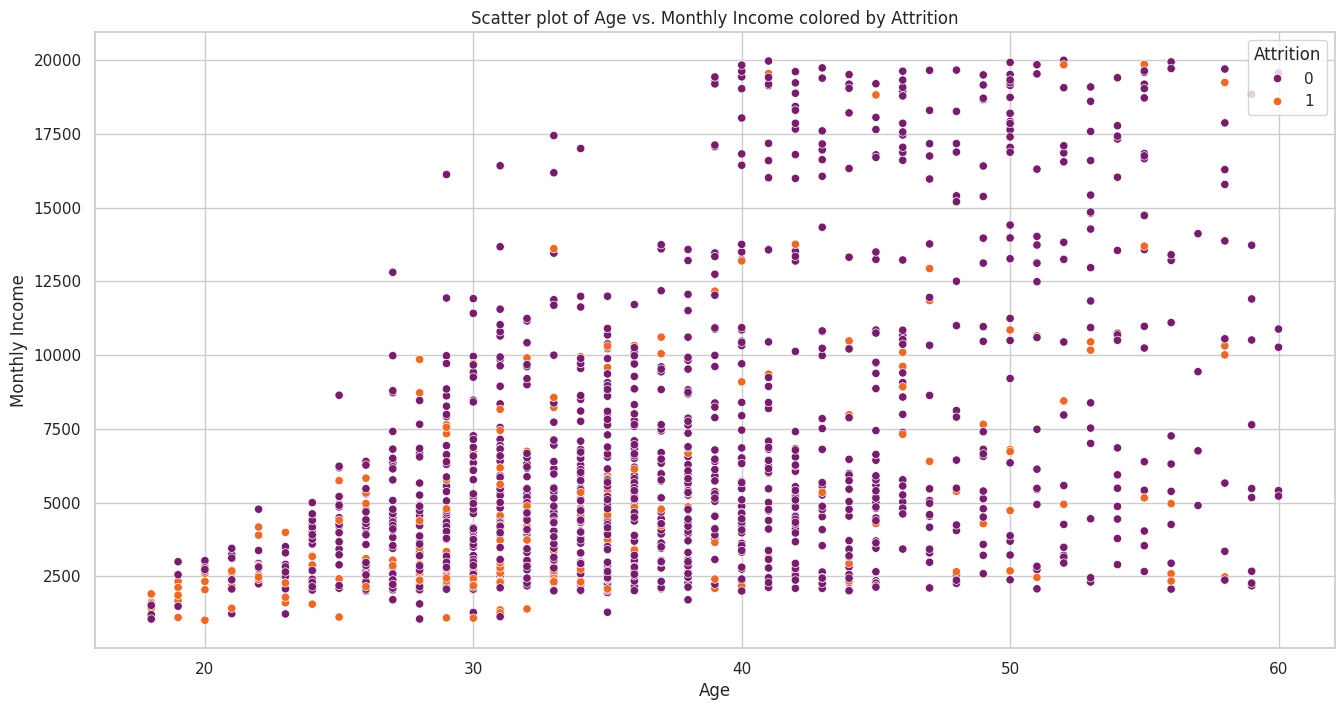

In [ ]:
# Scatter plot of Age vs. MonthlyIncome colored by Attrition
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df, palette="inferno")
plt.title('Scatter plot of Age vs. Monthly Income colored by Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', loc='upper right')
plt.show()

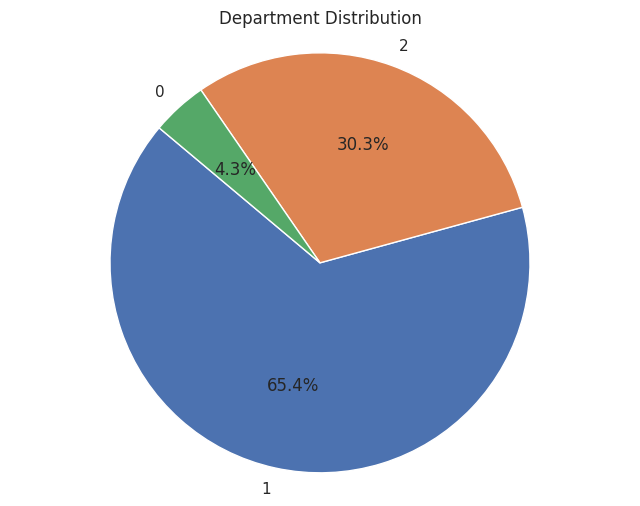

In [ ]:
# Pie chart of Department distribution
department_counts = df['Department'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Department Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model (Example: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100

# Print accuracy score
print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 86.73%


In [ ]:
# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred) * 100

# Print ROC AUC score
print("ROC AUC Score: {:.2f}%".format(roc_auc))

ROC AUC Score: 54.34%


In [ ]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[251   4]
 [ 35   4]]


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



In [ ]:
# Predict attrition for the entire dataset
entire_data_attrition_predict = model.predict(X)

In [ ]:
# Count the number of employees predicted to leave the company (attrition = 1)
num_leave_company = sum(entire_data_attrition_predict)

In [ ]:
# Display the number of employees predicted to leave the company
print("Number of employees predicted to leave the company:", num_leave_company)

Number of employees predicted to leave the company: 206


In [ ]:
# Create new data with all features
new_data = pd.DataFrame({
    'Age': [30],  # Example age
    'BusinessTravel': ['Travel_Rarely'],  # Example business travel type
    'DailyRate': [500],  # Example daily rate
    'Department': ['Research & Development'],  # Example department
    'DistanceFromHome': [10],  # Example distance from home
    'Education': [3],  # Example education level
    'EducationField': ['Life Sciences'],  # Example education field
    'EmployeeCount': [1],  # Example employee count
    'EmployeeNumber': [1500],  # Example employee number
    'EnvironmentSatisfaction': [2],  # Example environment satisfaction level
    'Gender': ['Female'],  # Example gender
    'HourlyRate': [50],  # Example hourly rate
    'JobInvolvement': [3],  # Example job involvement level
    'JobLevel': [2],  # Example job level
    'JobRole': ['Research Scientist'],  # Example job role
    'JobSatisfaction': [3],  # Example job satisfaction level
    'MaritalStatus': ['Single'],  # Example marital status
    'MonthlyIncome': [4000],  # Example monthly income
    'MonthlyRate': [10000],  # Example monthly rate
    'NumCompaniesWorked': [2],  # Example number of companies worked
    'Over18': ['Y'],  # Example over 18 indicator
    'OverTime': ['Yes'],  # Example overtime indicator
    'PercentSalaryHike': [15],  # Example percent salary hike
    'PerformanceRating': [3],  # Example performance rating
    'RelationshipSatisfaction': [2],  # Example relationship satisfaction level
    'StandardHours': [80],  # Example standard hours
    'StockOptionLevel': [1],  # Example stock option level
    'TotalWorkingYears': [8],  # Example total working years
    'TrainingTimesLastYear': [2],  # Example training times last year
    'WorkLifeBalance': [3],  # Example work-life balance level
    'YearsAtCompany': [4],  # Example years at company
    'YearsInCurrentRole': [2],  # Example years in current role
    'YearsSinceLastPromotion': [1],  # Example years since last promotion
    'YearsWithCurrManager': [2]  # Example years with current manager
})

In [ ]:
# Encode categorical variables in new data
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = label_encoders[column].transform(new_data[column])

In [ ]:
# Predict attrition for new data
attrition_prediction = model.predict(new_data)

In [ ]:
# Display the result of attrition
if len(attrition_prediction) > 0:
    print("Attrition prediction for the employee:", attrition_prediction[0])
else:
    print("No attrition prediction available.")

Attrition prediction for the employee: 0
